### Further analysis

In [1]:
""" Import packages """
import os
from datetime import datetime
import pickle
import sys
import logging
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '../scripts/')

logging.basicConfig(filename='../logs/modeling.log', filemode='a',
                    encoding='utf-8', level=logging.DEBUG)

warnings.filterwarnings("ignore")


In [2]:
from explorer import DataTransformer
from utils_cleaner import DataFrameCleaner
from utils_plots import EDAPlots
from feature_engineering import FeatureEnginnering
from utils_analysis import estimate_var_effect_with_arima

transformer = DataTransformer() 
plotmaker = EDAPlots()

In [3]:
import statsmodels.api as sm
import warnings

In [4]:
REPO = "../"
filepath_model = "../data/cleaned/final/cleaned_project_dataset.csv"
rev_model = "clpdat3n"

filepath_futur = "../data/cleaned/final/downloaded_projections_data.csv"
rev_futur = "cldfdat2"


### Import the model data

In [5]:
data = transformer.load_data(ext="csv", filepath=filepath_model, repo=REPO, rev=rev_model, header=0, parse_dates=["Date"])
data.head()

,Country,ISO3,Date,Target_1,Target_2,Target_3,Feature_1,Feature_2,Feature_3,Feature_4,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,Burkina Faso,BFA,2000-12-31,603.21100,874.85,249.82,2.55,43.4316,15.4232,3.020,...,6.857565,9762505.0,714.73,29.06,22.72,0,0,0.0,0.0,0.0
1,Burkina Faso,BFA,2001-12-31,601.93774,918.92,264.60,2.97,44.7725,15.5302,3.060,...,6.867020,9978658.0,749.26,29.19,22.77,0,0,0.0,0.0,0.0
2,Burkina Faso,BFA,2002-12-31,595.85205,958.85,274.54,2.90,46.1706,15.6492,3.089,...,6.874386,10199547.0,690.37,29.47,23.24,0,0,0.0,0.0,0.0
3,Burkina Faso,BFA,2003-12-31,585.12330,965.41,278.27,2.60,47.6264,15.7656,3.120,...,6.865103,10424994.0,935.59,29.34,23.12,0,0,0.0,0.0,0.0
4,Burkina Faso,BFA,2004-12-31,562.41130,925.19,267.83,3.00,49.1447,15.8710,3.156,...,6.873132,10654996.0,752.75,29.41,23.25,0,0,0.0,0.0,0.0


### Target vs vaccine trials

In [6]:
df_arima_vac = data[["Country", "Date", "Target_1", "Target_2", "Target_3", "Feature_26", "Feature_27"]]
df_arima_vac.set_index(["Country", "Date"] , inplace=True)

In [7]:
target_vars = ['Target_1', 'Target_2', 'Target_3']  # List of target variable names
exogenous_vars = ["Feature_26", "Feature_27"]

In [8]:
### Overall
estimate_var_effect_with_arima(df_arima_vac, target_vars, exogenous_vars)

Best ARIMA order for Target_1: (2, 1, 2)
                               SARIMAX Results                                
Dep. Variable:               Target_1   No. Observations:                  483
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2574.795
Date:                Wed, 06 Dec 2023   AIC                           5163.591
Time:                        20:00:38   BIC                           5192.836
Sample:                             0   HQIC                          5175.085
                                - 483                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Feature_26   -11.1206     14.110     -0.788      0.431     -38.776      16.534
Feature_27    25.1549     26.161      0.962      0.336     -26.120      76.430
ar.L1      

In [9]:
### Burkina Faso
estimate_var_effect_with_arima(df_arima_vac.loc["Burkina Faso"], target_vars, exogenous_vars)

Best ARIMA order for Target_1: (0, 2, 0)
                               SARIMAX Results                                
Dep. Variable:               Target_1   No. Observations:                   23
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -88.106
Date:                Wed, 06 Dec 2023   AIC                            182.213
Time:                        20:01:15   BIC                            185.347
Sample:                    12-31-2000   HQIC                           182.893
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Feature_26     2.4195      5.436      0.445      0.656      -8.235      13.074
Feature_27   -14.8166     15.016     -0.987      0.324     -44.247      14.614
sigma2     

In [10]:
### Ghana
estimate_var_effect_with_arima(df_arima_vac.loc["Ghana"], target_vars, exogenous_vars)

Best ARIMA order for Target_1: (0, 2, 1)
                               SARIMAX Results                                
Dep. Variable:               Target_1   No. Observations:                   23
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -71.269
Date:                Wed, 06 Dec 2023   AIC                            150.539
Time:                        20:01:33   BIC                            154.717
Sample:                    12-31-2000   HQIC                           151.446
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Feature_26     0.5641      2.424      0.233      0.816      -4.188       5.316
Feature_27          0   5.99e-10          0      1.000   -1.17e-09    1.17e-09
ma.L1      

In [11]:
### Kenya
estimate_var_effect_with_arima(df_arima_vac.loc["Kenya"], target_vars, exogenous_vars)

Best ARIMA order for Target_1: (0, 2, 2)
                               SARIMAX Results                                
Dep. Variable:               Target_1   No. Observations:                   23
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 -75.616
Date:                Wed, 06 Dec 2023   AIC                            161.232
Time:                        20:01:52   BIC                            166.454
Sample:                    12-31-2000   HQIC                           162.365
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Feature_26    -1.3727     10.917     -0.126      0.900     -22.769      20.024
Feature_27     0.7067     18.192      0.039      0.969     -34.949      36.362
ma.L1      

In [12]:
### Malawi
estimate_var_effect_with_arima(df_arima_vac.loc["Malawi"], target_vars, exogenous_vars)

Best ARIMA order for Target_1: (2, 2, 2)
                               SARIMAX Results                                
Dep. Variable:               Target_1   No. Observations:                   23
Model:                 ARIMA(2, 2, 2)   Log Likelihood                 -83.869
Date:                Wed, 06 Dec 2023   AIC                            181.739
Time:                        20:02:07   BIC                            189.050
Sample:                    12-31-2000   HQIC                           183.325
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Feature_26    -1.8447      9.560     -0.193      0.847     -20.581      16.892
Feature_27          0    4.1e+05          0      1.000   -8.03e+05    8.03e+05
ar.L1      

#### Description of some features

In [13]:
variables_to_consider = {
 'ITN_Access': 'Feature_1',
 'Domestic general government health expenditure (% of general government expenditure)': 'Feature_11',
 'External health expenditure (% of current health expenditure)': 'Feature_12',
 'People using at least basic sanitation services, rural (% of rural population)': 'Feature_13',
 'People using safely managed sanitation services, rural (% of rural population)': 'Feature_14',
 'Population living in slums (% of urban population)': 'Feature_15',
 'Foreign direct investment, net inflows (% of GDP)': 'Feature_16',
}

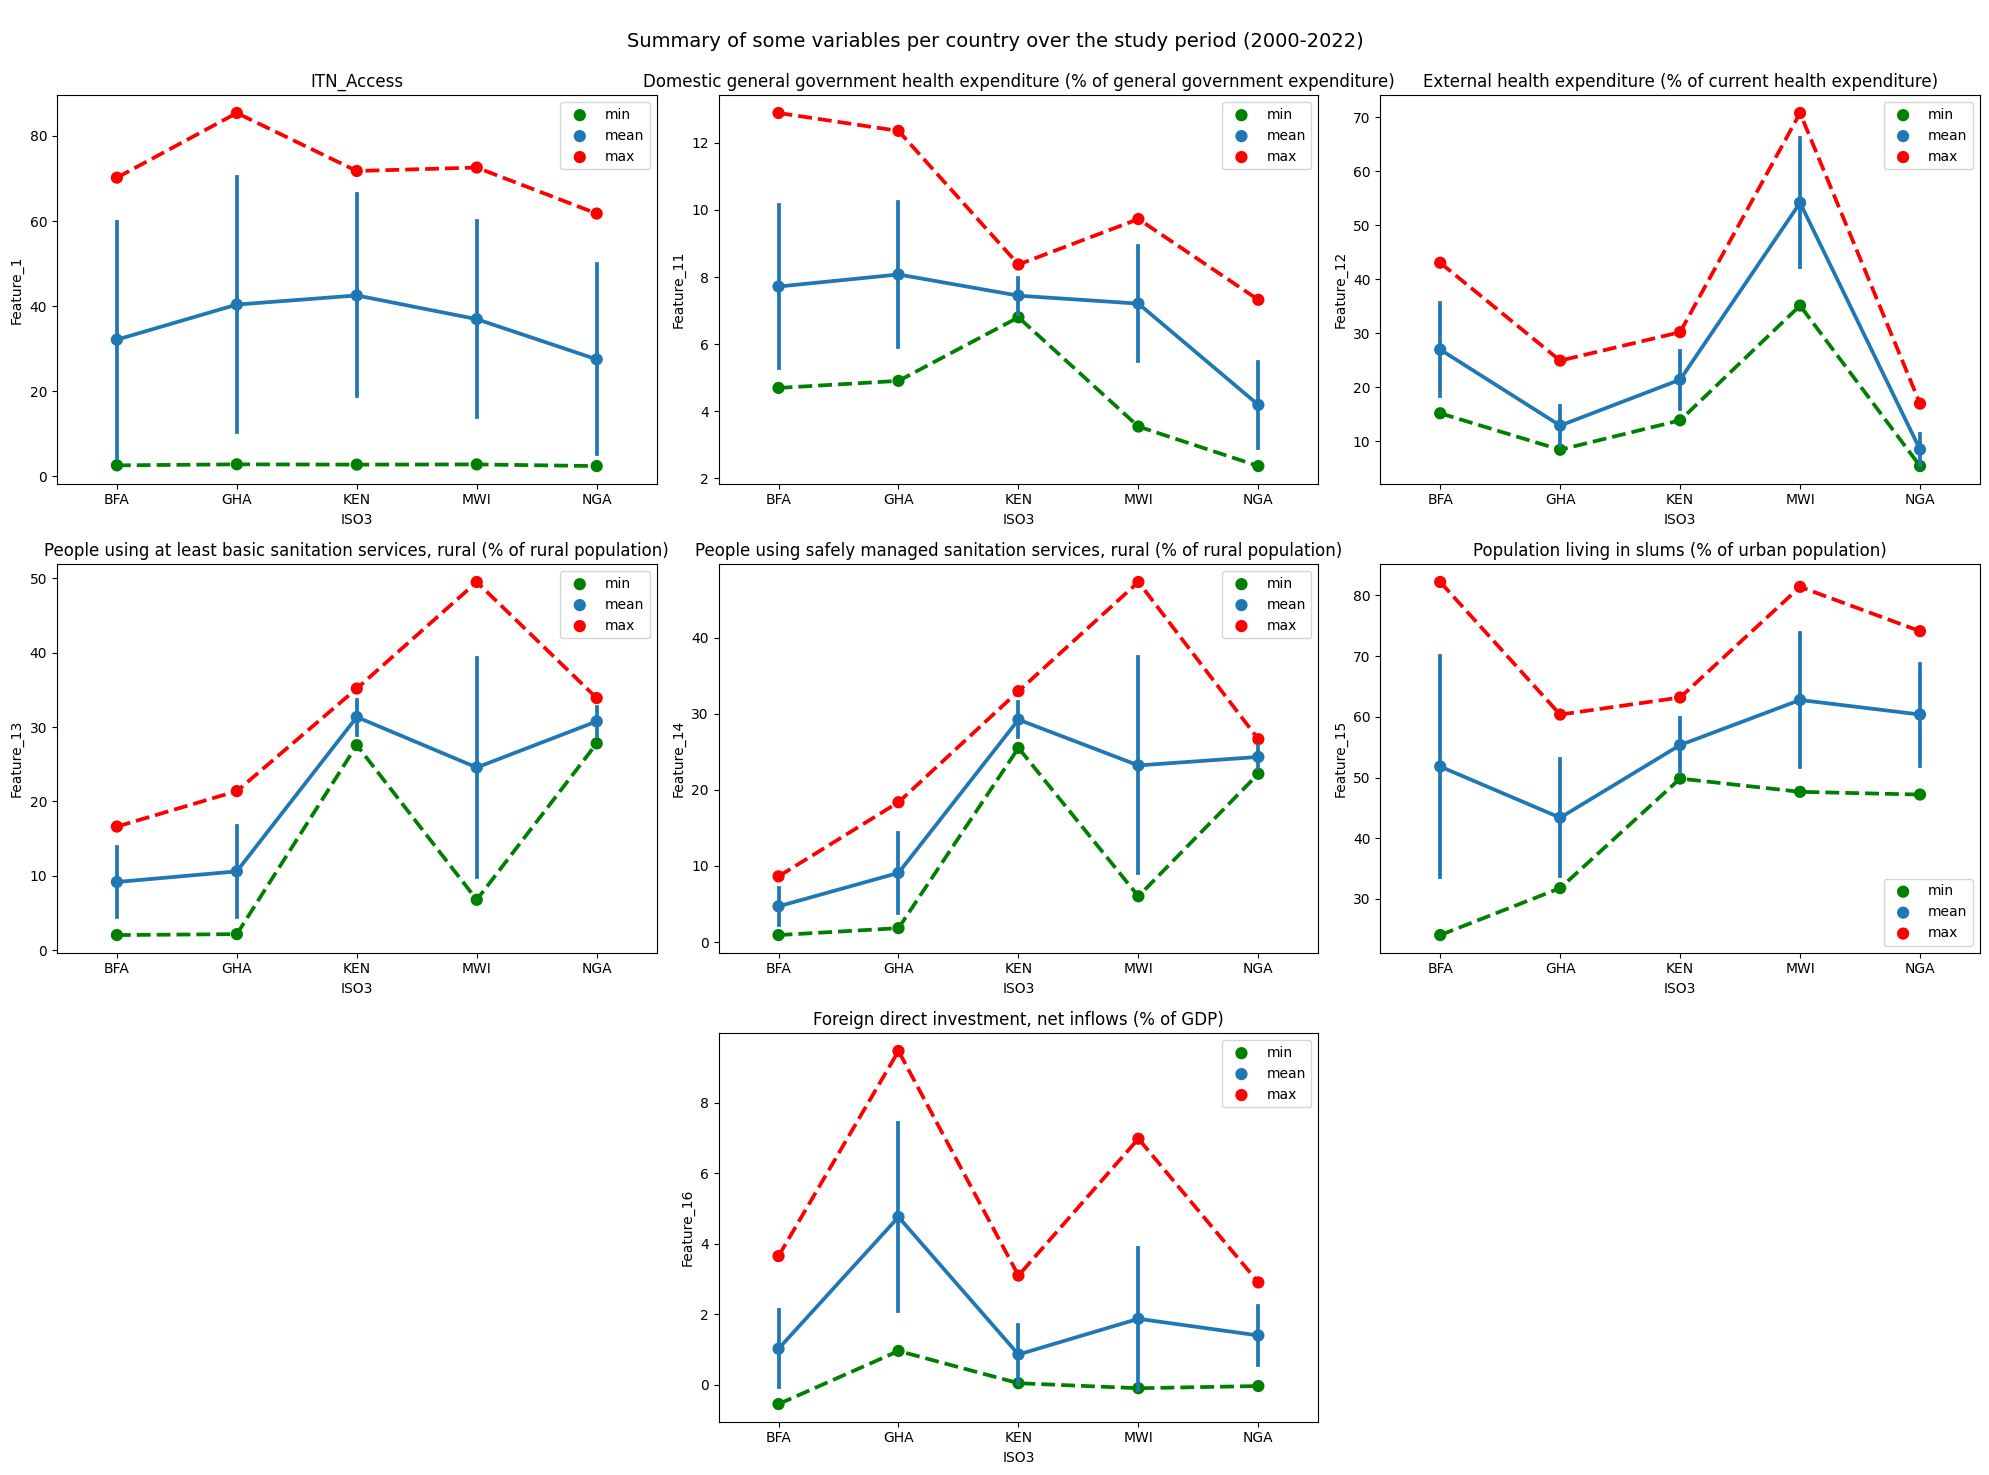

In [14]:
plotmaker.describe_per_country(
    data=data[data["ISO3"].isin(["BFA", "GHA", "KEN", "MWI", "NGA"])].reset_index(), 
    country_column="ISO3", 
    variables=list(variables_to_consider.values()), 
    nrows=3,
    ncols=3, 
    figsize=(20, 15), 
    nfigs=7, 
    centered=True, 
    subtitles=list(variables_to_consider.keys()),
    target=False
)

### Partial autocorrelation functions

#### Target_1

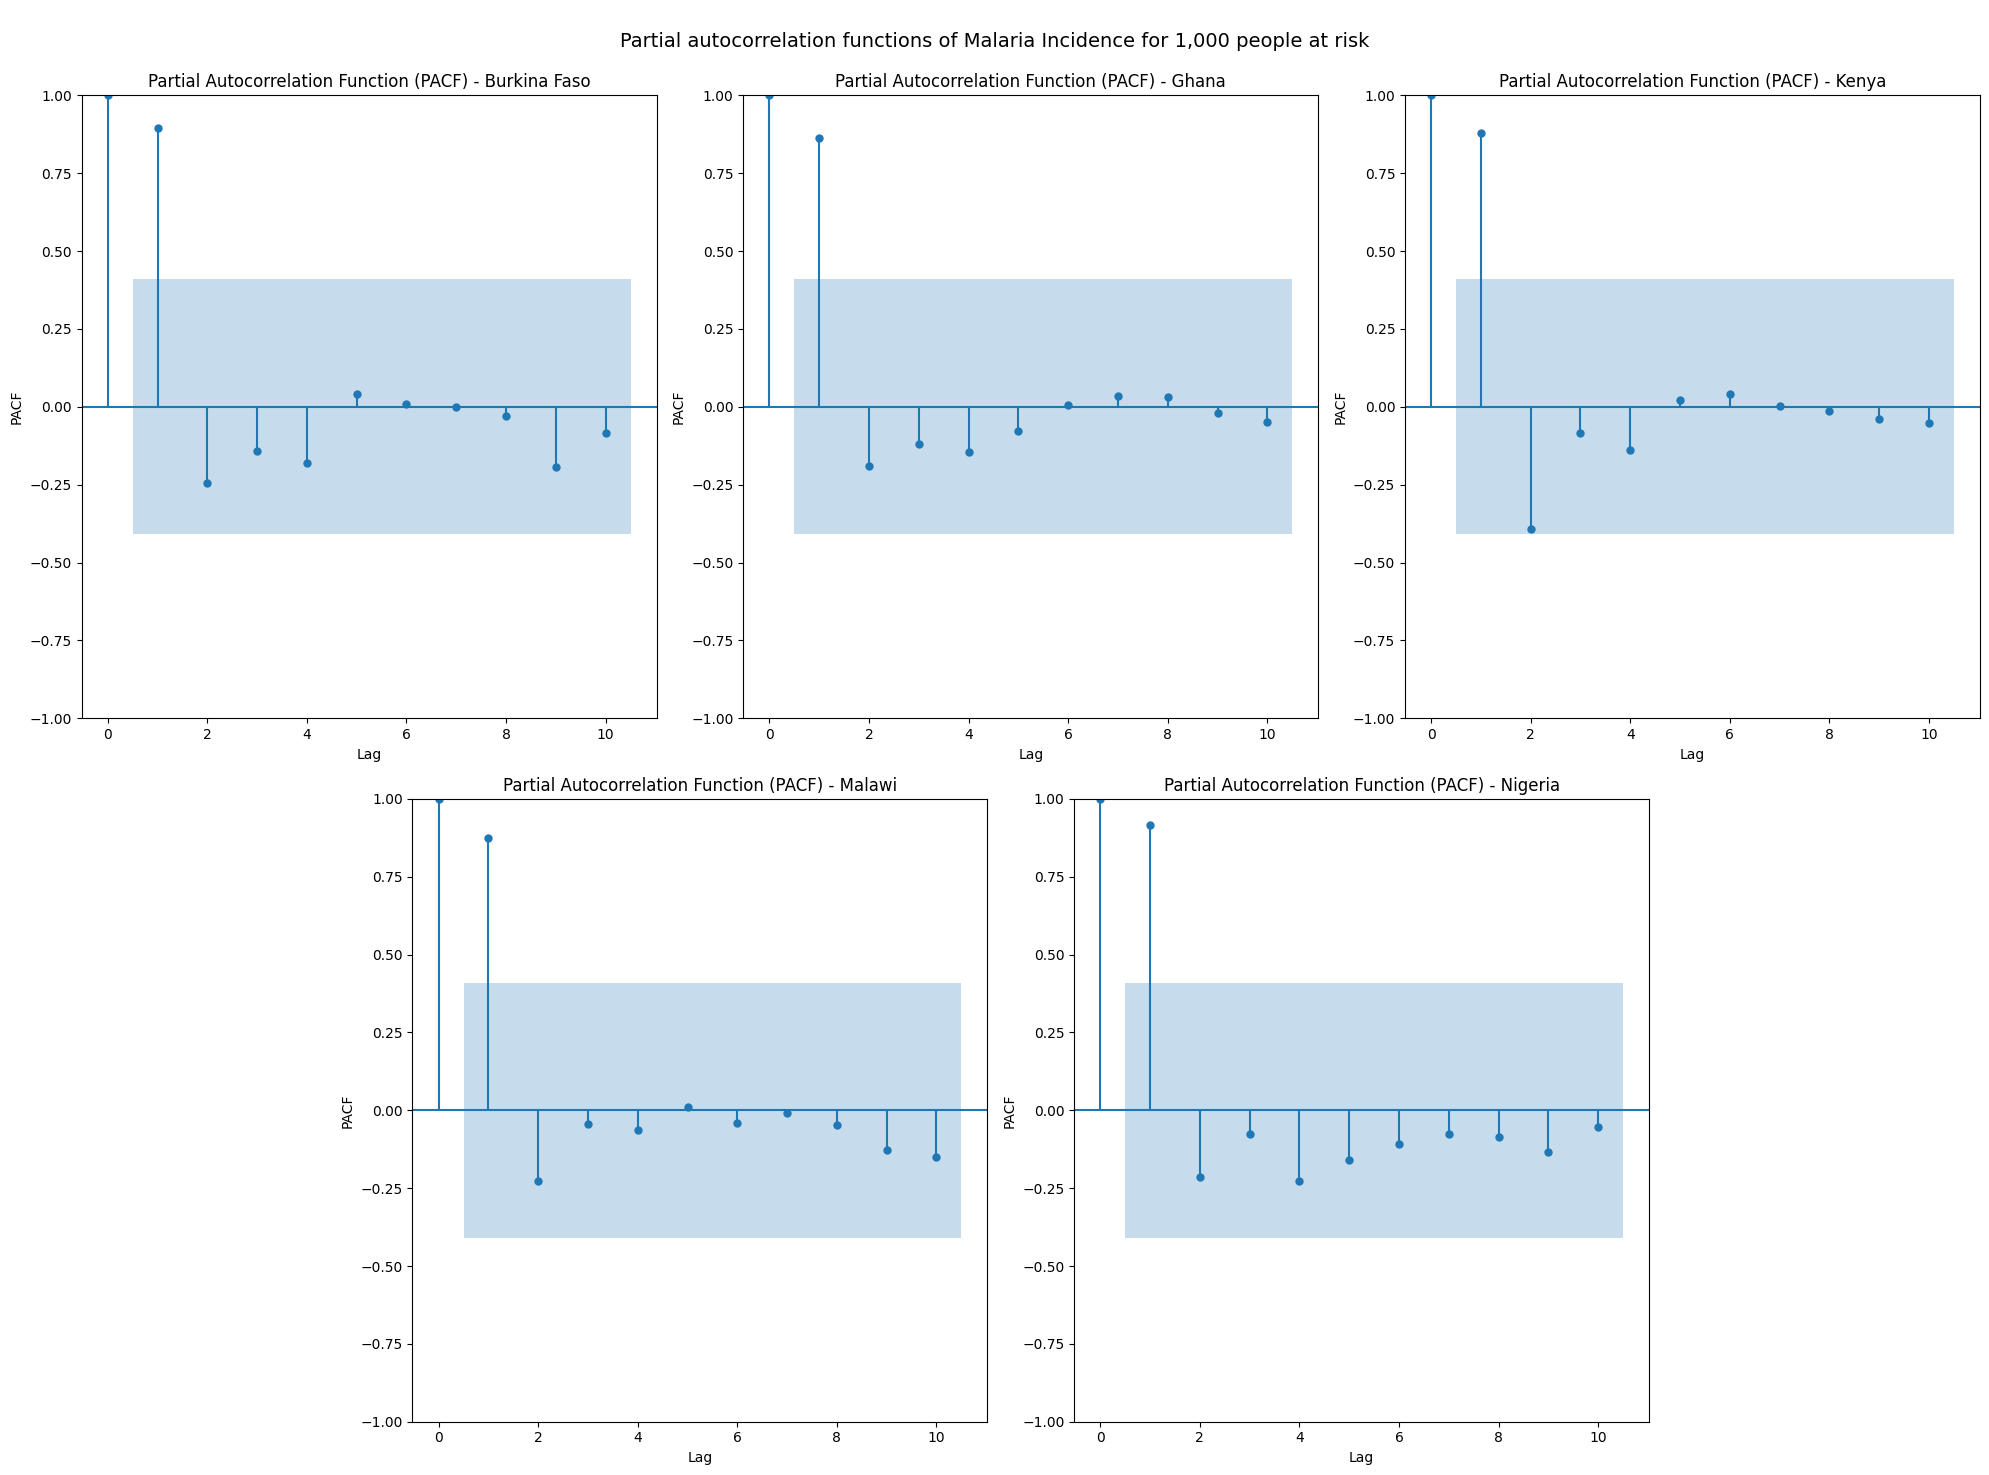

In [15]:
plotmaker.plot_pacf_function_per_country(
    data.set_index(["ISO3", "Country", "Date"]),
    variable="Target_1", 
    variable_name='Malaria Incidence for 1,000 people at risk',
    nrows=2,
    ncols=3, 
    figsize=(20, 15), 
    nfigs=5, 
    countries_codes=["BFA", "GHA", "KEN", "MWI", "NGA"],
    countries_names=["Burkina Faso", "Ghana", "Kenya", "Malawi", "Nigeria"],
    centered=True,
)

#### Target_2

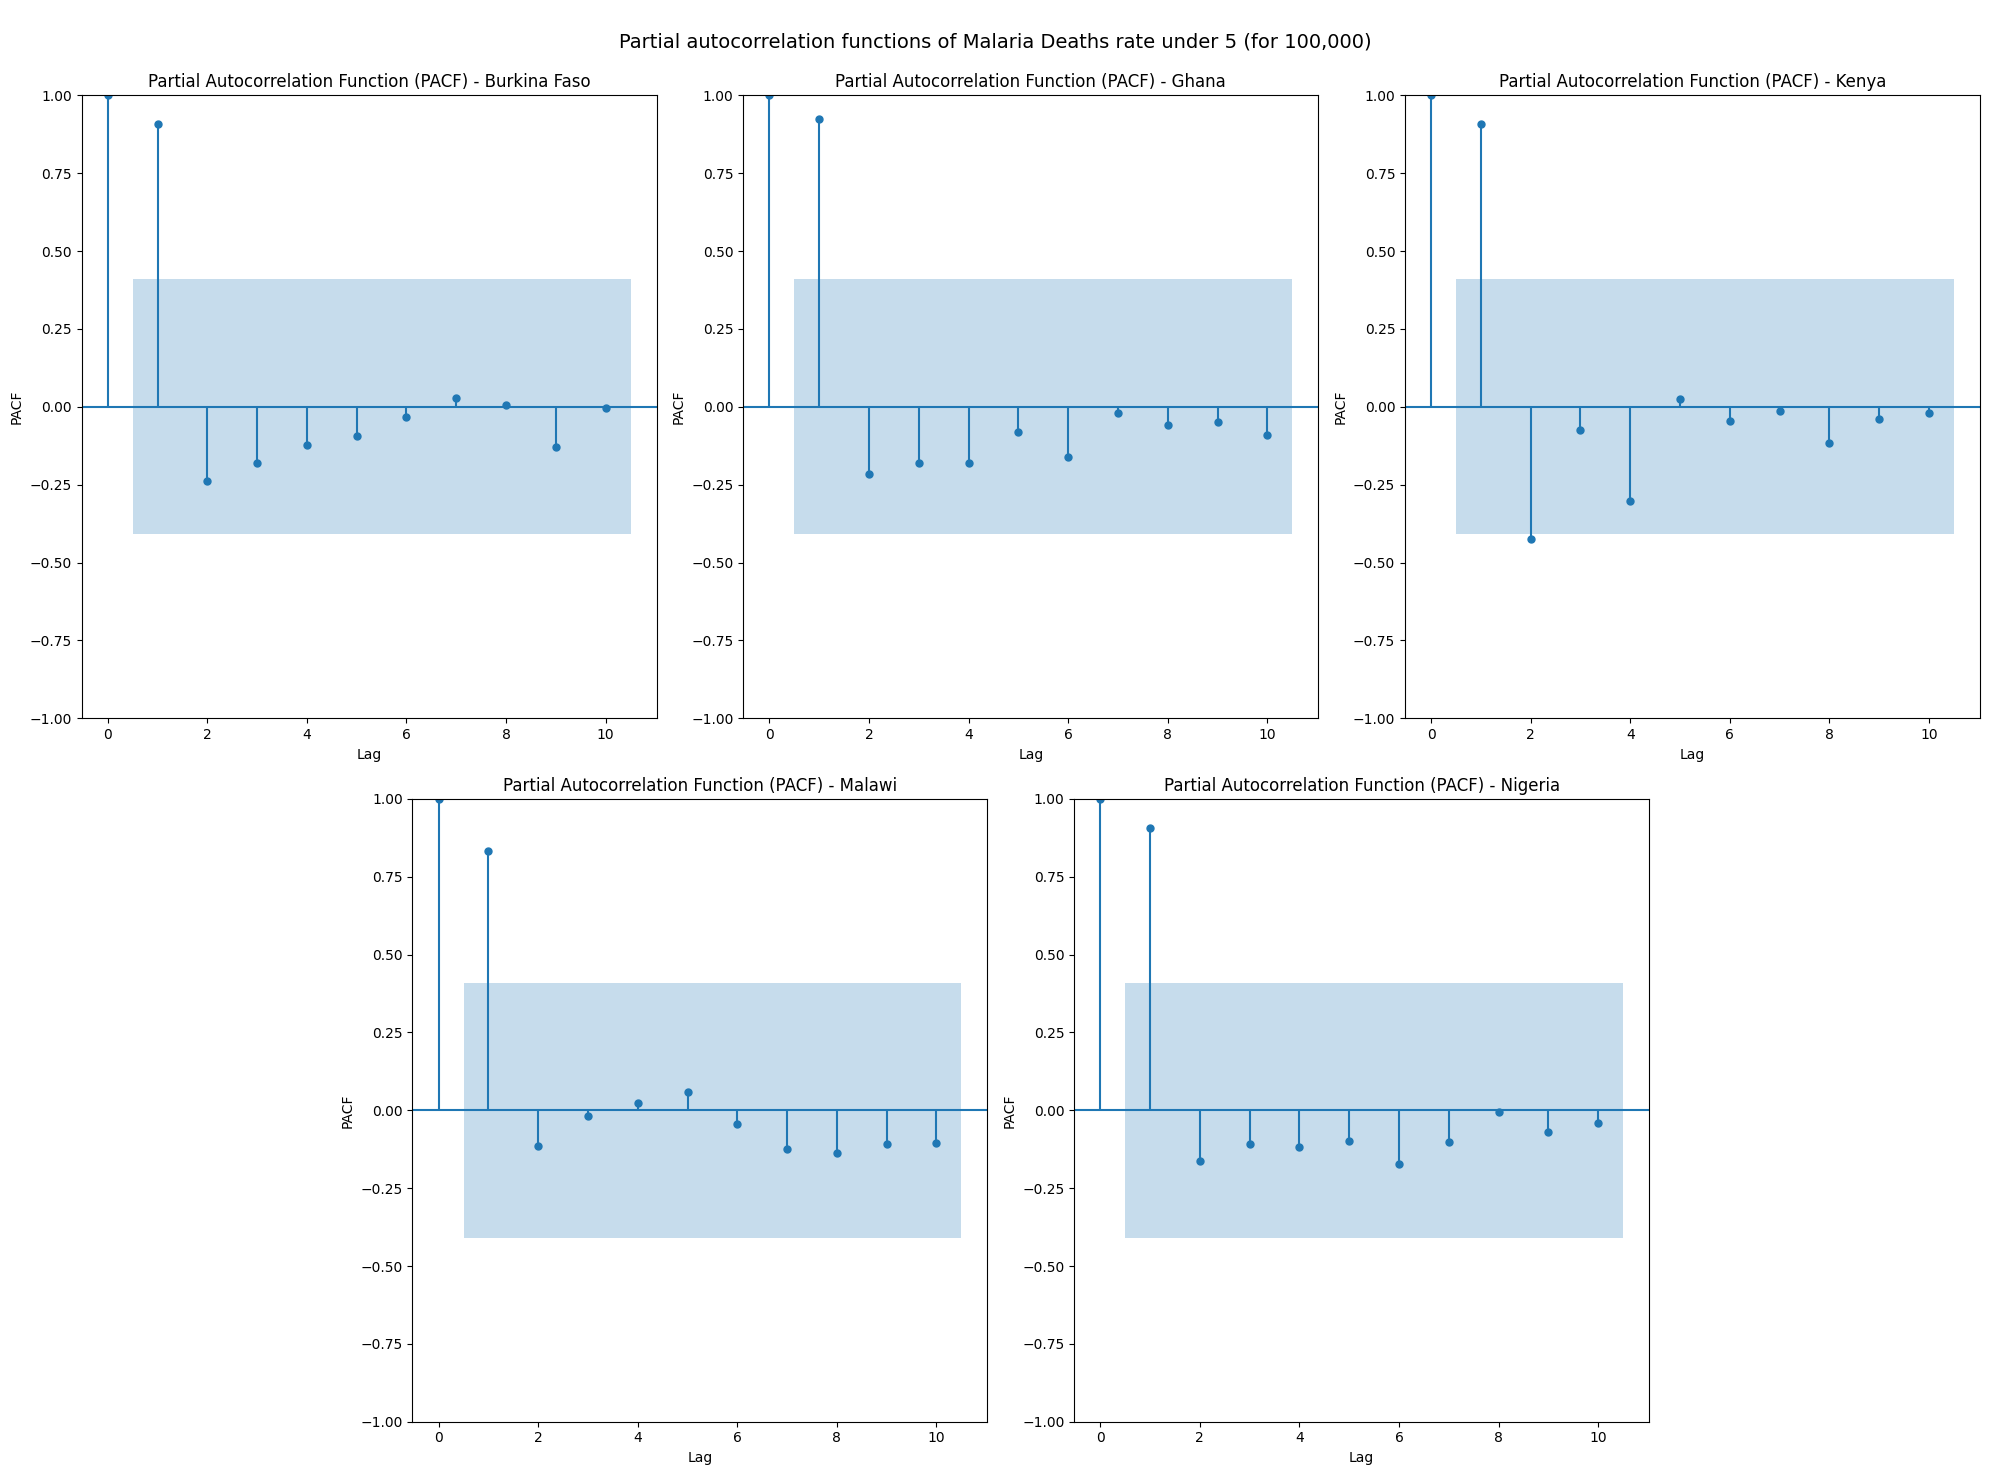

In [16]:
plotmaker.plot_pacf_function_per_country(
    data.set_index(["ISO3", "Country", "Date"]), 
    variable="Target_2", 
    variable_name='Malaria Deaths rate under 5 (for 100,000)',
    nrows=2,
    ncols=3,
    figsize=(20, 15), 
    nfigs=5,
    countries_codes=["BFA", "GHA", "KEN", "MWI", "NGA"],
    countries_names=["Burkina Faso", "Ghana", "Kenya", "Malawi", "Nigeria"],
    centered=True
)

#### Target_3

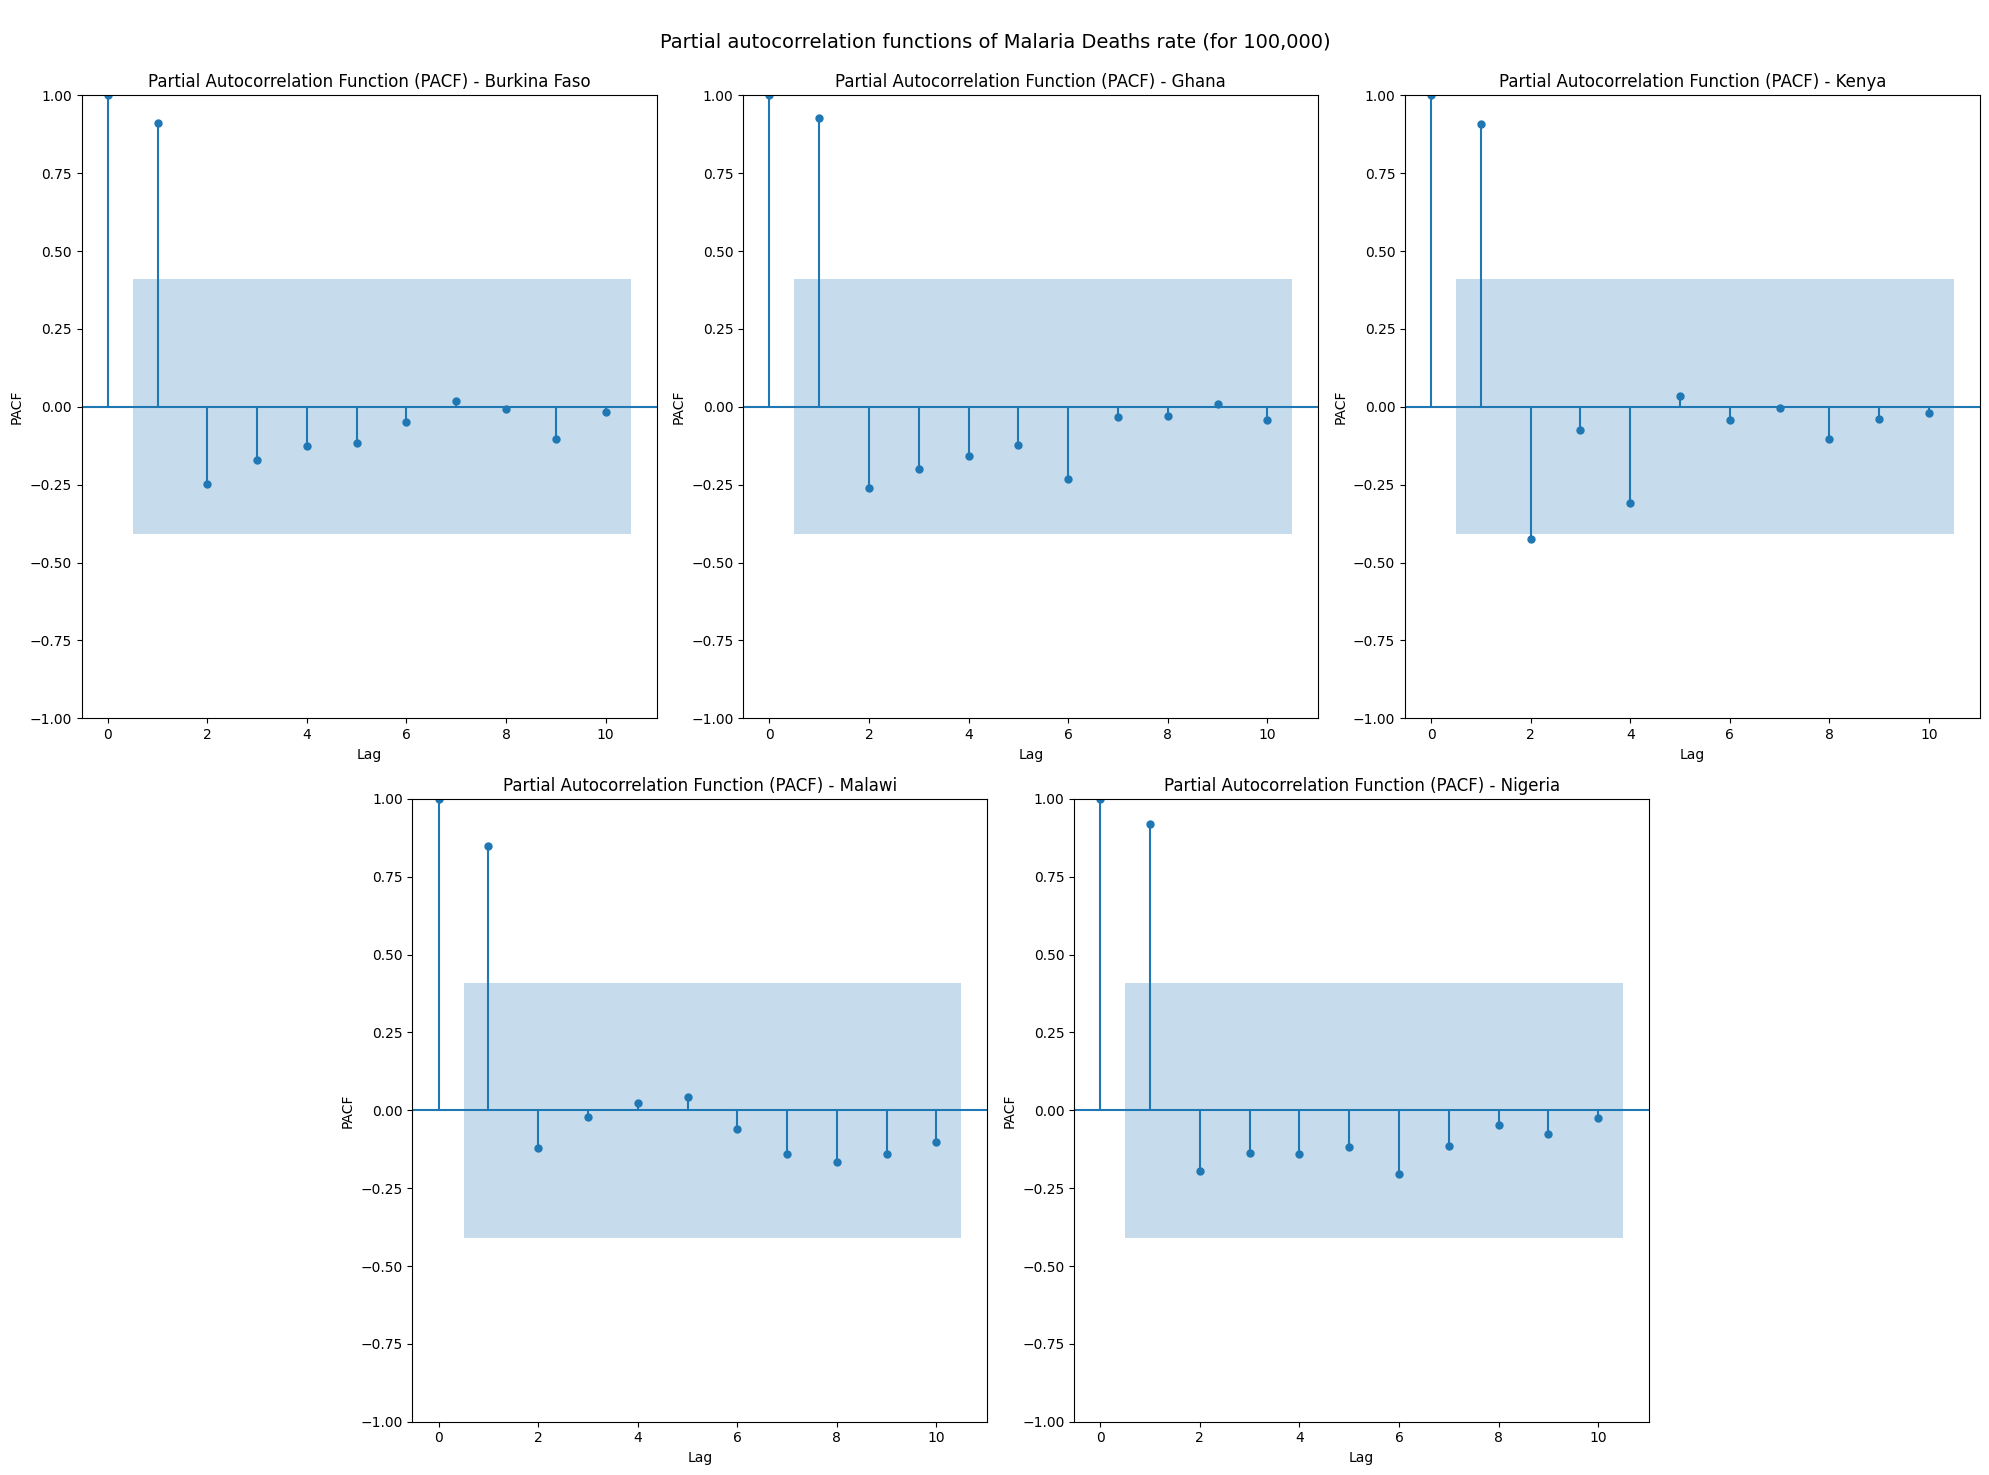

In [17]:
plotmaker.plot_pacf_function_per_country(
    data.set_index(["ISO3", "Country", "Date"]), 
    variable="Target_3", 
    variable_name="Malaria Deaths rate (for 100,000)",
    nrows=2,
    ncols=3, 
    figsize=(20, 15), 
    nfigs=5, 
    centered=True,
    countries_codes=["BFA", "GHA", "KEN", "MWI", "NGA"],
    countries_names=["Burkina Faso", "Ghana", "Kenya", "Malawi", "Nigeria"]
)

### Looking at targets and other variables effect

In [18]:
variables_to_consider = {
 'ITN_Access': 'Feature_1',
 'Domestic general government health expenditure (% of general government expenditure)': 'Feature_11',
 'External health expenditure (% of current health expenditure)': 'Feature_12',
 'People using at least basic sanitation services, rural (% of rural population)': 'Feature_13',
 'People using safely managed sanitation services, rural (% of rural population)': 'Feature_14',
 'Population living in slums (% of urban population)': 'Feature_15',
 'Foreign direct investment, net inflows (% of GDP)': 'Feature_16',
}

In [19]:
target_vars = ['Target_1', 'Target_2', 'Target_3']  # List of target variable names
exogenous_vars_other = ["Feature_1", "Feature_11", "Feature_12", "Feature_13", "Feature_14", "Feature_15", "Feature_16"]
index_cols = ["Country", "Date"]
df_arima_other = data[index_cols+target_vars+exogenous_vars_other]
df_arima_other.set_index(index_cols, inplace=True)

In [20]:
estimate_var_effect_with_arima(df_arima_other, target_vars, exogenous_vars_other)

Best ARIMA order for Target_1: (2, 1, 1)
                               SARIMAX Results                                
Dep. Variable:               Target_1   No. Observations:                  483
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2506.328
Date:                Wed, 06 Dec 2023   AIC                           5034.657
Time:                        20:28:57   BIC                           5080.614
Sample:                             0   HQIC                          5052.718
                                - 483                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Feature_1     -0.7340      0.074     -9.857      0.000      -0.880      -0.588
Feature_11    -3.2798      0.904     -3.627      0.000      -5.052      -1.507
Feature_12 

In [21]:
### Burkina Faso
estimate_var_effect_with_arima(df_arima_other.loc["Burkina Faso"], target_vars, exogenous_vars_other)

Best ARIMA order for Target_1: (2, 2, 2)
                               SARIMAX Results                                
Dep. Variable:               Target_1   No. Observations:                   23
Model:                 ARIMA(2, 2, 2)   Log Likelihood                 -78.096
Date:                Wed, 06 Dec 2023   AIC                            180.191
Time:                        20:29:58   BIC                            192.726
Sample:                    12-31-2000   HQIC                           182.912
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Feature_1     -0.4209      0.337     -1.247      0.212      -1.082       0.240
Feature_11     0.9890      2.764      0.358      0.720      -4.428       6.406
Feature_12 

In [22]:
### Ghana
estimate_var_effect_with_arima(df_arima_other.loc["Ghana"], target_vars, exogenous_vars_other)

Best ARIMA order for Target_1: (0, 2, 2)
                               SARIMAX Results                                
Dep. Variable:               Target_1   No. Observations:                   23
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 -57.811
Date:                Wed, 06 Dec 2023   AIC                            135.622
Time:                        20:30:22   BIC                            146.067
Sample:                    12-31-2000   HQIC                           137.889
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Feature_1     -0.3178      0.131     -2.417      0.016      -0.575      -0.060
Feature_11    -0.2551      0.572     -0.446      0.656      -1.376       0.866
Feature_12 

In [23]:
### Kenya
estimate_var_effect_with_arima(df_arima_other.loc["Kenya"], target_vars, exogenous_vars_other)

Best ARIMA order for Target_1: (2, 2, 2)
                               SARIMAX Results                                
Dep. Variable:               Target_1   No. Observations:                   23
Model:                 ARIMA(2, 2, 2)   Log Likelihood                 -55.061
Date:                Wed, 06 Dec 2023   AIC                            134.122
Time:                        20:30:45   BIC                            146.657
Sample:                    12-31-2000   HQIC                           136.843
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Feature_1      0.2241      0.357      0.628      0.530      -0.475       0.923
Feature_11    -2.0237      1.698     -1.191      0.233      -5.353       1.305
Feature_12 

In [24]:
### Malawi
estimate_var_effect_with_arima(df_arima_other.loc["Malawi"], target_vars, exogenous_vars_other)

Best ARIMA order for Target_1: (2, 2, 1)
                               SARIMAX Results                                
Dep. Variable:               Target_1   No. Observations:                   23
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -74.323
Date:                Wed, 06 Dec 2023   AIC                            170.645
Time:                        20:31:07   BIC                            182.135
Sample:                    12-31-2000   HQIC                           173.139
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Feature_1     -0.1321      0.129     -1.025      0.306      -0.385       0.121
Feature_11     4.2934      2.319      1.852      0.064      -0.251       8.838
Feature_12 

In [25]:
# Nigeria
estimate_var_effect_with_arima(df_arima_other.loc["Nigeria"], target_vars, exogenous_vars_other)

Best ARIMA order for Target_1: (0, 2, 0)
                               SARIMAX Results                                
Dep. Variable:               Target_1   No. Observations:                   23
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -62.218
Date:                Wed, 06 Dec 2023   AIC                            140.436
Time:                        20:31:32   BIC                            148.793
Sample:                    12-31-2000   HQIC                           142.250
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Feature_1     -0.8171      0.411     -1.989      0.047      -1.622      -0.012
Feature_11     1.6159      0.772      2.092      0.036       0.102       3.130
Feature_12 

In [26]:
variables_to_consider = {
 'ITN_Access': 'Feature_1',
 'Domestic general government health expenditure (% of general government expenditure)': 'Feature_11',
 'External health expenditure (% of current health expenditure)': 'Feature_12',
 'People using at least basic sanitation services, rural (% of rural population)': 'Feature_13',
}

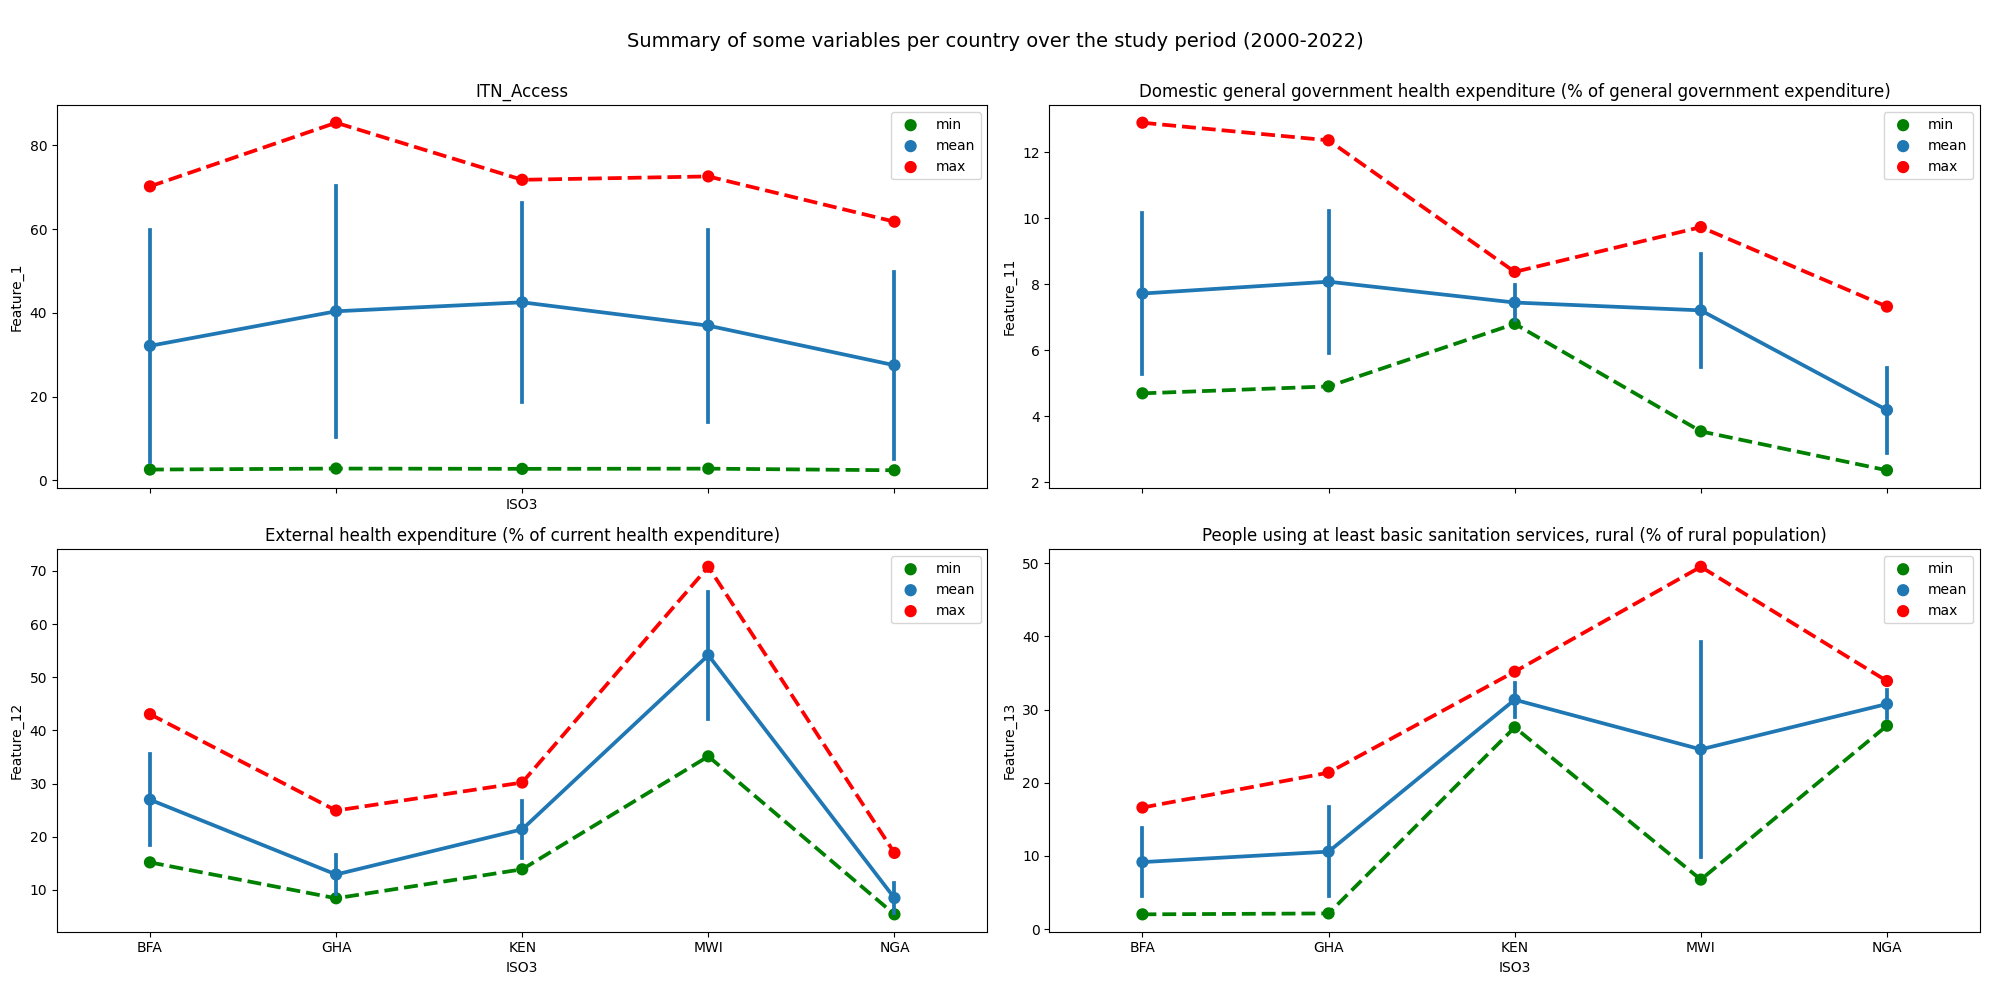

In [27]:
plotmaker.describe_per_country(
    data=data[data["ISO3"].isin(["BFA", "GHA", "KEN", "MWI", "NGA"])].reset_index(), 
    country_column="ISO3", 
    variables=list(variables_to_consider.values()), 
    nrows=2,
    ncols=2, 
    figsize=(20, 10), 
    nfigs=7, 
    centered=False, 
    subtitles=list(variables_to_consider.keys()),
    target=False
)